# Experiment 1: Linear Regression

In [155]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [156]:
df = pd.read_csv("../../data/energy/df.csv", )
df.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
0,1054,32658,-16.064,-76.599,112.441,0.000,0.955,-0.296,35,28449.0,13.415,1,1
1,1054,32671,-16.208,-76.707,112.611,-0.719,0.415,0.558,24,28450.0,13.415,1,1
2,1053,32639,-16.064,-76.624,122.011,0.000,0.830,0.558,12,28450.0,13.415,1,1
3,1054,32670,-16.064,-76.624,112.611,0.000,0.830,0.558,54,28450.0,13.415,1,1
4,1054,32664,-15.968,-76.625,112.559,0.478,0.827,0.296,47,28451.0,13.415,1,1


# Define target and predictors

In [157]:
y = df['energy']

X = df[['pos_x', 'pos_y', 'pos_z',
        'dir_x', 'dir_y', 'dir_z',
        'tot', 'time', 'label']]

# EDA

CORRELATION MATRIX:


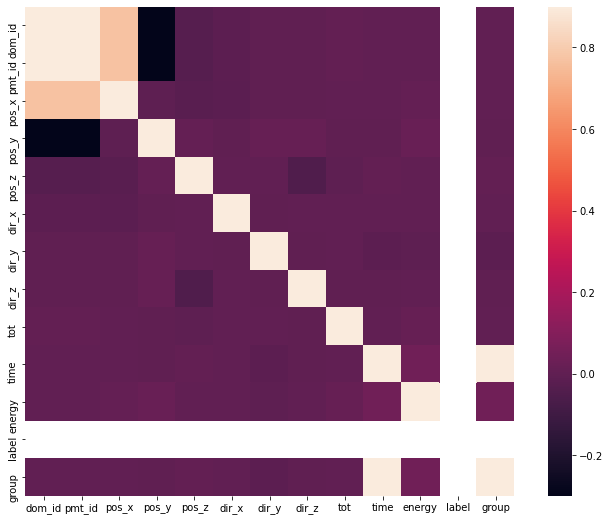

In [158]:
print("CORRELATION MATRIX:")
corr_matrix = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

SKEW in Target Variable: 0.8826858180493037
PROBABILITY PLOT: 


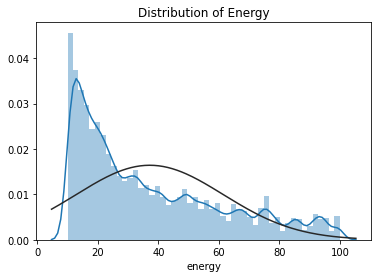

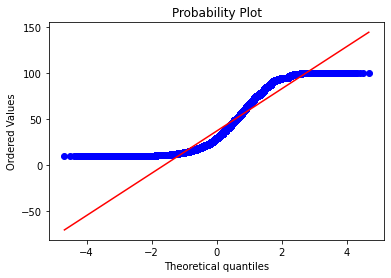

In [159]:
print("SKEW in Target Variable: {}".format(y.skew()))
print("PROBABILITY PLOT: ")
sns.distplot(y, fit=stats.norm).set_title("Distribution of Energy")
fig = plt.figure()
res = stats.probplot(y, plot=plt)

# Data Transformation

BoxCox returns best results.

SKEW in Target Variable after LOG TRANSFORMATION : 0.12230373536393746


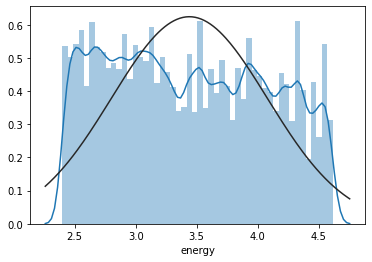

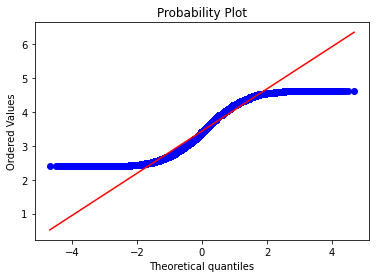

In [160]:
log_y = np.log1p(y)
log_y.skew()

print("SKEW in Target Variable after LOG TRANSFORMATION : {}".format(log_y.skew()))

sns.distplot(log_y , fit=stats.norm)
fig = plt.figure()
res = stats.probplot(log_y, plot=plt)

SKEW in Target Variable after SQUARE TRANSFORMATION : 0.4929017659165522


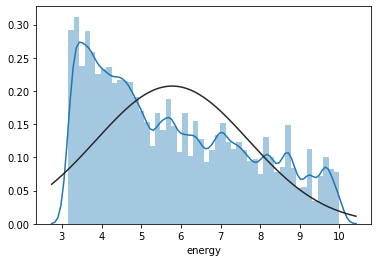

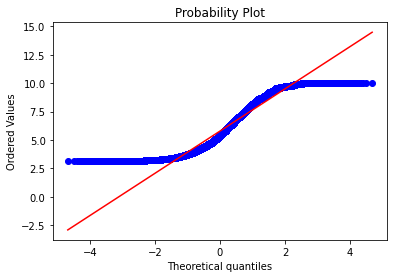

In [161]:
sq_y = np.sqrt(y)
sq_y.skew()
print("SKEW in Target Variable after SQUARE TRANSFORMATION : {}".format(sq_y.skew()))

sns.distplot(sq_y , fit=stats.norm)
fig = plt.figure()
res = stats.probplot(sq_y, plot=plt)

SKEW in Target Variable after BOXCOX TRANSFORMATION : 0.024214883060462995


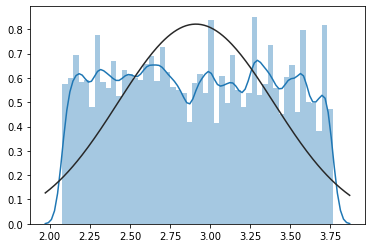

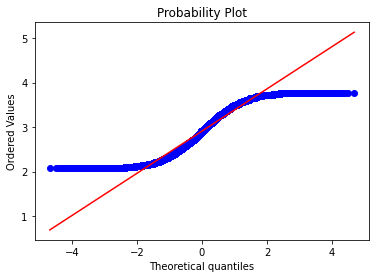

In [162]:
boxcox_y,_ = stats.boxcox(y)
boxcox_y = pd.Series(boxcox_y)
print("SKEW in Target Variable after BOXCOX TRANSFORMATION : {}".format(boxcox_y.skew()))

sns.distplot(boxcox_y , fit=stats.norm)
fig = plt.figure()
res = stats.probplot(boxcox_y,
                     dist=stats.norm,
                     plot=plt)

In [163]:
y = boxcox_y

# Split Dataset 

Dataset needs to be split into:
1. Main
    1. Train
    2. Test
2. Holdout for Testing on Unseen Data

Steps:
1. Identify Length of Dataset: `489906`
2. `90/10` Split for Main/Holdout Data
3. Save Last 10% as Holdout Data
    1. for `X`
    2. for `y`
4. Save first 90% as Main Data
    1. for `X`
    2. for `y`
5. `80/20` Train/Test Split on Main Data

In [164]:
# (1)
df_len = len(df)

# (2)
main_len = int(round(0.9 * df_len))
hold_len = df_len - main_len

# (3)
hold_X = X[-hold_len:]
hold_y = y[-hold_len:]

# (4)
X.drop(X.tail(hold_len).index, inplace=True)
y.drop(y.tail(hold_len).index, inplace=True) 

# (5)
train_len = int(round(0.8 * main_len))
test_len = main_len - train_len

# (6) Split the data into training/testing sets
X_train = X[:-train_len]
X_test = X[-test_len:]
y_train = y[:-train_len]
y_test = y[-test_len:]

print("DATASET LENGTH: {}".format(df_len))
print("MAIN DATASET LENGTH: {} \nHOLDOUT DATASET LENGHT: {}".format(main_len, hold_len))
print("TRAIN DATA LENGTH: {}".format(train_len))
print("TEST DATA LENGTH: {}".format(test_len))

DATASET LENGTH: 489906
MAIN DATASET LENGTH: 440915 
HOLDOUT DATASET LENGHT: 48991
TRAIN DATA LENGTH: 352732
TEST DATA LENGTH: 88183


/Users/shrutirao/Documents/Coding/Thesis/km3net/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Model

In [165]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# Results

In [169]:
print('Coefficients: \n {}'.format(regr.coef_))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 5.87027374e-04  9.30744128e-05 -3.26235455e-04  5.35525785e-03
  8.03718912e-03  2.33899463e-02  1.41544820e-03  6.76366380e-09
  0.00000000e+00]
Mean squared error: 0.41
Coefficient of determination: -0.69


([], <a list of 0 Text major ticklabel objects>)

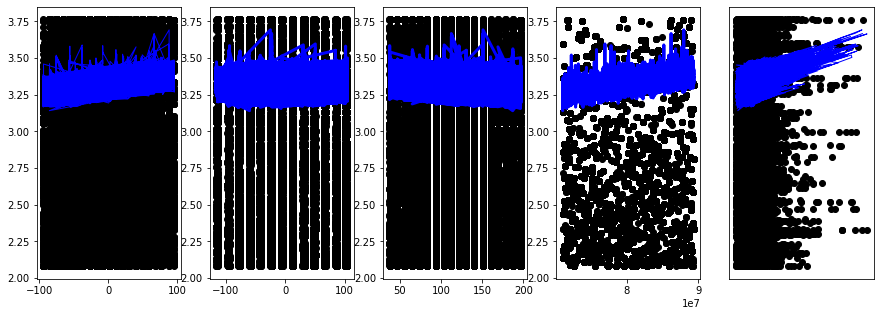

In [194]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15,5))

ax1.scatter(X_test['pos_x'], y_test,  color='black')
ax1.plot(X_test['pos_x'], y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

ax2.scatter(X_test['pos_y'], y_test,  color='black')
ax2.plot(X_test['pos_y'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

ax3.scatter(X_test['pos_z'], y_test,  color='black')
ax3.plot(X_test['pos_z'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

ax4.scatter(X_test['time'], y_test,  color='black')
ax4.plot(X_test['time'], y_pred, color='blue', linewidth=3)

ax5.scatter(X_test['tot'], y_test,  color='black')
ax5.plot(X_test['tot'], y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

# Save Model

In [195]:
filename = 'finalized_model.sav'
pickle.dump(regr, open(filename, 'wb'))

# Unseen Data

In [201]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

-0.6883391035577457


In [231]:
Xnew = hold_X
type(Xnew)

pandas.core.frame.DataFrame

In [237]:
for i in range(len(Xnew)):
    print(Xnew.iloc[1])
    break

pos_x   -8.347700e+01
pos_y   -2.187800e+01
pos_z    8.344100e+01
dir_x    8.270000e-01
dir_y    4.780000e-01
dir_z   -2.960000e-01
tot      3.400000e+01
time     8.940474e+07
label    1.000000e+00
Name: 440916, dtype: float64


In [227]:
ynew = loaded_model.predict(Xnew)

In [240]:
type(ynew)

numpy.ndarray

In [245]:
for i in range(len(Xnew)):
    print("Predicted Values: {} ".format(ynew[i]))

Predicted Values: 3.367995012422346 
Predicted Values: 3.3675832010560214 
Predicted Values: 3.331961385623205 
Predicted Values: 3.374230232593241 
Predicted Values: 3.359468490941378 
Predicted Values: 3.3473957055577364 
Predicted Values: 3.326749431638188 
Predicted Values: 3.4035251945703773 
Predicted Values: 3.339246354280626 
Predicted Values: 3.382981820334531 
Predicted Values: 3.3471533502818245 
Predicted Values: 3.3150290603115913 
Predicted Values: 3.3198886205305547 
Predicted Values: 3.3612974788688246 
Predicted Values: 3.346418115673049 
Predicted Values: 3.3343944872204436 
Predicted Values: 3.362980236948187 
Predicted Values: 3.3734617949654075 
Predicted Values: 3.3601375831357387 
Predicted Values: 3.3652355382766643 
Predicted Values: 3.3366211998829254 
Predicted Values: 3.389458986164994 
Predicted Values: 3.3392751394271016 
Predicted Values: 3.367622432335173 
Predicted Values: 3.3490061866481278 
Predicted Values: 3.3369139710913323 
Predicted Values: 3.344

Predicted Values: 3.389026843516601 
Predicted Values: 3.408242971031309 
Predicted Values: 3.3961397431166027 
Predicted Values: 3.368009047841135 
Predicted Values: 3.3408151141415994 
Predicted Values: 3.3980894123560437 
Predicted Values: 3.3755592658339313 
Predicted Values: 3.4093781649882713 
Predicted Values: 3.331479678302868 
Predicted Values: 3.3560816220088894 
Predicted Values: 3.3942977464518544 
Predicted Values: 3.377681495448085 
Predicted Values: 3.3830560343346505 
Predicted Values: 3.3950745207268707 
Predicted Values: 3.3668662943572683 
Predicted Values: 3.400009220914624 
Predicted Values: 3.411406311856867 
Predicted Values: 3.3841466009780428 
Predicted Values: 3.362706810936802 
Predicted Values: 3.3887981690038016 
Predicted Values: 3.374631729034046 
Predicted Values: 3.3513758800213633 
Predicted Values: 3.358669537419701 
Predicted Values: 3.38587287094882 
Predicted Values: 3.386141162546204 
Predicted Values: 3.3656797036182073 
Predicted Values: 3.37035

Predicted Values: 3.397511089897886 
Predicted Values: 3.426552823420476 
Predicted Values: 3.4267632991309274 
Predicted Values: 3.396866015683106 
Predicted Values: 3.4008097680871634 
Predicted Values: 3.4261580690073536 
Predicted Values: 3.4286515396450987 
Predicted Values: 3.4014916093451397 
Predicted Values: 3.4310286227391833 
Predicted Values: 3.4154296885240765 
Predicted Values: 3.4150137225387467 
Predicted Values: 3.4263584538234015 
Predicted Values: 3.430904219898834 
Predicted Values: 3.386787126631447 
Predicted Values: 3.3728920683929893 
Predicted Values: 3.4210956819255536 
Predicted Values: 3.405876154489952 
Predicted Values: 3.3816938371539917 
Predicted Values: 3.3944970137980026 
Predicted Values: 3.4168661564248892 
Predicted Values: 3.439642549756844 
Predicted Values: 3.4473197007868506 
Predicted Values: 3.413276609291671 
Predicted Values: 3.40543410969437 
Predicted Values: 3.3981739741648527 
Predicted Values: 3.4139970951937384 
Predicted Values: 3.36

Predicted Values: 3.389976249999691 
Predicted Values: 3.3803885792297574 
Predicted Values: 3.4164467128333227 
Predicted Values: 3.3934045854049675 
Predicted Values: 3.382011072496542 
Predicted Values: 3.406818657257814 
Predicted Values: 3.4002965851078906 
Predicted Values: 3.4136505780161923 
Predicted Values: 3.4243229381665463 
Predicted Values: 3.4081872647233884 
Predicted Values: 3.3739015038275078 
Predicted Values: 3.4099704361679537 
Predicted Values: 3.403354036269686 
Predicted Values: 3.4188300055903382 
Predicted Values: 3.426811892583056 
Predicted Values: 3.428625623298898 
Predicted Values: 3.4118541789970855 
Predicted Values: 3.427389781408789 
Predicted Values: 3.4167788664540315 
Predicted Values: 3.3985526254531395 
Predicted Values: 3.3695210039201404 
Predicted Values: 3.4345545418177212 
Predicted Values: 3.4281131202436614 
Predicted Values: 3.400292634440497 
Predicted Values: 3.3743372432797623 
Predicted Values: 3.447587371936163 
Predicted Values: 3.4

Predicted Values: 3.4055788532658093 
Predicted Values: 3.4248446186561425 
Predicted Values: 3.4096928852915234 
Predicted Values: 3.412478820021584 
Predicted Values: 3.4007027619855785 
Predicted Values: 3.403572964280653 
Predicted Values: 3.399669964377196 
Predicted Values: 3.4114524514189855 
Predicted Values: 3.3842334482364076 
Predicted Values: 3.4088717319450095 
Predicted Values: 3.4059103457525683 
Predicted Values: 3.395320918647888 
Predicted Values: 3.418517898021045 
Predicted Values: 3.3996674538282545 
Predicted Values: 3.4123088035880746 
Predicted Values: 3.404682739510652 
Predicted Values: 3.415780177658573 
Predicted Values: 3.42852890083922 
Predicted Values: 3.3984066160898645 
Predicted Values: 3.4072345232378796 
Predicted Values: 3.372131929425184 
Predicted Values: 3.4016398191695543 
Predicted Values: 3.427464737551918 
Predicted Values: 3.3917454357498387 
Predicted Values: 3.398214987525519 
Predicted Values: 3.404220111518043 
Predicted Values: 3.40478

Predicted Values: 3.348732365767723 
Predicted Values: 3.3692608827171644 
Predicted Values: 3.390765695022847 
Predicted Values: 3.394164429899785 
Predicted Values: 3.353934920478267 
Predicted Values: 3.349203269007765 
Predicted Values: 3.3253837184746358 
Predicted Values: 3.369497606881052 
Predicted Values: 3.347788023714349 
Predicted Values: 3.3552639644162903 
Predicted Values: 3.3644119419226746 
Predicted Values: 3.3871604977335954 
Predicted Values: 3.401656709876163 
Predicted Values: 3.3711118403473614 
Predicted Values: 3.3332425126393836 
Predicted Values: 3.4519923501652223 
Predicted Values: 3.346168435649841 
Predicted Values: 3.3681189457507577 
Predicted Values: 3.4284260778374893 
Predicted Values: 3.36932860375453 
Predicted Values: 3.332720893193644 
Predicted Values: 3.378573696720377 
Predicted Values: 3.393708304012905 
Predicted Values: 3.4164579374318285 
Predicted Values: 3.415202497300087 
Predicted Values: 3.3224079541105738 
Predicted Values: 3.4504154

Predicted Values: 3.369049562640234 
Predicted Values: 3.379937679428749 
Predicted Values: 3.398628642413419 
Predicted Values: 3.4168229004983526 
Predicted Values: 3.407723830223444 
Predicted Values: 3.4052990461721473 
Predicted Values: 3.3860879874448715 
Predicted Values: 3.4412668546813814 
Predicted Values: 3.3700591693204203 
Predicted Values: 3.391011972867844 
Predicted Values: 3.394389670146884 
Predicted Values: 3.404487960147022 
Predicted Values: 3.366194586901046 
Predicted Values: 3.405443860780211 
Predicted Values: 3.4428100445075587 
Predicted Values: 3.402855322721428 
Predicted Values: 3.4372310128364987 
Predicted Values: 3.3710101406948145 
Predicted Values: 3.380130255739688 
Predicted Values: 3.365583375588239 
Predicted Values: 3.3922797580764037 
Predicted Values: 3.4275902879807396 
Predicted Values: 3.3983739988706807 
Predicted Values: 3.3633298312717494 
Predicted Values: 3.4224871479813075 
Predicted Values: 3.388926296776969 
Predicted Values: 3.36363

Predicted Values: 3.4665183775931134 
Predicted Values: 3.4647932344447896 
Predicted Values: 3.456810842463528 
Predicted Values: 3.419251723484132 
Predicted Values: 3.420445973025779 
Predicted Values: 3.4726009674863954 
Predicted Values: 3.451341860510529 
Predicted Values: 3.4600364337079776 
Predicted Values: 3.440760802352421 
Predicted Values: 3.485053160729585 
Predicted Values: 3.507432567115609 
Predicted Values: 3.4665810150774483 
Predicted Values: 3.461176451580153 
Predicted Values: 3.480513014204152 
Predicted Values: 3.410983252689301 
Predicted Values: 3.4232406959170194 
Predicted Values: 3.4146326475496998 
Predicted Values: 3.3820520018692144 
Predicted Values: 3.4629912081074874 
Predicted Values: 3.449813015551183 
Predicted Values: 3.429034802108262 
Predicted Values: 3.464237795563438 
Predicted Values: 3.435826678354436 
Predicted Values: 3.4246928362922002 
Predicted Values: 3.4261981224757903 
Predicted Values: 3.457561187411863 
Predicted Values: 3.4602553

Predicted Values: 3.365968335653622 
Predicted Values: 3.3718743760968413 
Predicted Values: 3.3936852542799314 
Predicted Values: 3.3682857576468295 
Predicted Values: 3.390799019556174 
Predicted Values: 3.386964749200618 
Predicted Values: 3.3912831899010922 
Predicted Values: 3.424082287098728 
Predicted Values: 3.383498184646437 
Predicted Values: 3.388179769614042 
Predicted Values: 3.430197298905224 
Predicted Values: 3.3680991164899803 
Predicted Values: 3.331987478807032 
Predicted Values: 3.3551735298426366 
Predicted Values: 3.412687279122659 
Predicted Values: 3.371364122156402 
Predicted Values: 3.3790516457073934 
Predicted Values: 3.3558039609478696 
Predicted Values: 3.363106552665688 
Predicted Values: 3.422902731621671 
Predicted Values: 3.362218326220281 
Predicted Values: 3.4119049714261305 
Predicted Values: 3.39738762526526 
Predicted Values: 3.4101552736756062 
Predicted Values: 3.3864902721807524 
Predicted Values: 3.3423533230244535 
Predicted Values: 3.3971599

Predicted Values: 3.396225797563416 
Predicted Values: 3.4400168004036624 
Predicted Values: 3.445466888894546 
Predicted Values: 3.4379204095480063 
Predicted Values: 3.431890221286679 
Predicted Values: 3.458998626665541 
Predicted Values: 3.4534721498592322 
Predicted Values: 3.4056006191584367 
Predicted Values: 3.4086541177399416 
Predicted Values: 3.4127623054431386 
Predicted Values: 3.4332422142950025 
Predicted Values: 3.4263651621786617 
Predicted Values: 3.4089194400055938 
Predicted Values: 3.4092189388350995 
Predicted Values: 3.4127969490244423 
Predicted Values: 3.3998306756236705 
Predicted Values: 3.429542985185404 
Predicted Values: 3.3954717612404903 
Predicted Values: 3.377910526409438 
Predicted Values: 3.452183334391478 
Predicted Values: 3.4138655044986708 
Predicted Values: 3.399123764418709 
Predicted Values: 3.3984954189331296 
Predicted Values: 3.474202560009676 
Predicted Values: 3.402189119855945 
Predicted Values: 3.37483548746759 
Predicted Values: 3.4330

Predicted Values: 3.414739274321563 
Predicted Values: 3.4546353602973 
Predicted Values: 3.4274018440996987 
Predicted Values: 3.433518976374721 
Predicted Values: 3.4357178410946303 
Predicted Values: 3.463358875835202 
Predicted Values: 3.467731026237261 
Predicted Values: 3.4948254220773523 
Predicted Values: 3.471919372593756 
Predicted Values: 3.427734414641812 
Predicted Values: 3.4131807298876415 
Predicted Values: 3.4478940795263378 
Predicted Values: 3.477151735405277 
Predicted Values: 3.4572962754149272 
Predicted Values: 3.454843805428177 
Predicted Values: 3.420553834826126 
Predicted Values: 3.461982230427815 
Predicted Values: 3.438111298980738 
Predicted Values: 3.472030322632711 
Predicted Values: 3.4391341859613767 
Predicted Values: 3.419442795743956 
Predicted Values: 3.441643427554721 
Predicted Values: 3.4525068408928963 
Predicted Values: 3.44442199997825 
Predicted Values: 3.45299594252451 
Predicted Values: 3.425696374459882 
Predicted Values: 3.41022978552679

Predicted Values: 3.375168334303836 
Predicted Values: 3.4077226659334823 
Predicted Values: 3.32049829637291 
Predicted Values: 3.348799915150706 
Predicted Values: 3.3924948535422628 
Predicted Values: 3.378163302624583 
Predicted Values: 3.384508185442439 
Predicted Values: 3.3385767932318293 
Predicted Values: 3.379422125657582 
Predicted Values: 3.3907940292793524 
Predicted Values: 3.373048457737369 
Predicted Values: 3.378789743290564 
Predicted Values: 3.355231969953434 
Predicted Values: 3.400479761968747 
Predicted Values: 3.405549225871569 
Predicted Values: 3.391450965250103 
Predicted Values: 3.381949648493169 
Predicted Values: 3.3875910241542053 
Predicted Values: 3.397445001213257 
Predicted Values: 3.362681031155145 
Predicted Values: 3.3416837025681474 
Predicted Values: 3.406013827261506 
Predicted Values: 3.360669632807955 
Predicted Values: 3.3800892421585678 
Predicted Values: 3.3790147943753968 
Predicted Values: 3.369269848860449 
Predicted Values: 3.36483592458

Predicted Values: 3.4055033939560984 
Predicted Values: 3.4256724402010827 
Predicted Values: 3.432022581828502 
Predicted Values: 3.3397435242388367 
Predicted Values: 3.39887509518032 
Predicted Values: 3.414525464924109 
Predicted Values: 3.3851725598986993 
Predicted Values: 3.3844805058217147 
Predicted Values: 3.409789715834595 
Predicted Values: 3.366764381202948 
Predicted Values: 3.381526449687361 
Predicted Values: 3.3717469388555084 
Predicted Values: 3.370327656099392 
Predicted Values: 3.4643770375829175 
Predicted Values: 3.400293628563795 
Predicted Values: 3.4231953963320665 
Predicted Values: 3.351313386359624 
Predicted Values: 3.374988374965719 
Predicted Values: 3.421855593229529 
Predicted Values: 3.38351007492784 
Predicted Values: 3.3711868405992402 
Predicted Values: 3.399844227891514 
Predicted Values: 3.3558599928134174 
Predicted Values: 3.3969043598765567 
Predicted Values: 3.4145329348607008 
Predicted Values: 3.3790388671752187 
Predicted Values: 3.3768230

Predicted Values: 3.448206925909688 
Predicted Values: 3.432313949546647 
Predicted Values: 3.4256026505516424 
Predicted Values: 3.4067768638125404 
Predicted Values: 3.448443448441564 
Predicted Values: 3.40546614690835 
Predicted Values: 3.392774078818981 
Predicted Values: 3.4203192969996445 
Predicted Values: 3.4394056472770402 
Predicted Values: 3.400156799608295 
Predicted Values: 3.4184532222100232 
Predicted Values: 3.442847644348978 
Predicted Values: 3.4117705311774538 
Predicted Values: 3.3987340940437947 
Predicted Values: 3.4643135446658664 
Predicted Values: 3.385981778014901 
Predicted Values: 3.407307621972082 
Predicted Values: 3.4643514205842796 
Predicted Values: 3.4923504860659067 
Predicted Values: 3.3941485657909336 
Predicted Values: 3.3930572495249485 
Predicted Values: 3.434259689117274 
Predicted Values: 3.4315376843236685 
Predicted Values: 3.409529076037222 
Predicted Values: 3.4428438710940887 
Predicted Values: 3.4229860210965954 
Predicted Values: 3.4652

Predicted Values: 3.416204071111026 
Predicted Values: 3.4412103031258994 
Predicted Values: 3.427986564916479 
Predicted Values: 3.4458838033811734 
Predicted Values: 3.4336291706807627 
Predicted Values: 3.408530551026982 
Predicted Values: 3.443855371335938 
Predicted Values: 3.4291299004562226 
Predicted Values: 3.4562174910082923 
Predicted Values: 3.422624501119901 
Predicted Values: 3.4701018681838933 
Predicted Values: 3.4211595143598412 
Predicted Values: 3.4029451951023892 
Predicted Values: 3.416028145775455 
Predicted Values: 3.3622852249133164 
Predicted Values: 3.4335485453430814 
Predicted Values: 3.409399447025583 
Predicted Values: 3.4293258126603003 
Predicted Values: 3.4447149996681077 
Predicted Values: 3.4018288336569515 
Predicted Values: 3.3908192419988086 
Predicted Values: 3.428549578954187 
Predicted Values: 3.470810565248784 
Predicted Values: 3.411341932583615 
Predicted Values: 3.4159305925086754 
Predicted Values: 3.4657181147821747 
Predicted Values: 3.46

Predicted Values: 3.324296167741486 
Predicted Values: 3.3529282126598985 
Predicted Values: 3.356074841453318 
Predicted Values: 3.378126567385498 
Predicted Values: 3.4251286837298247 
Predicted Values: 3.4297483481677666 
Predicted Values: 3.387786823652172 
Predicted Values: 3.421367988099487 
Predicted Values: 3.3490620829057227 
Predicted Values: 3.3818527829518734 
Predicted Values: 3.381920122960326 
Predicted Values: 3.3540234409756726 
Predicted Values: 3.428250888129438 
Predicted Values: 3.450979127695205 
Predicted Values: 3.5012535526868085 
Predicted Values: 3.476505459677136 
Predicted Values: 3.4607447705108267 
Predicted Values: 3.427752698293258 
Predicted Values: 3.4755641636840116 
Predicted Values: 3.4437271974787897 
Predicted Values: 3.47887914046395 
Predicted Values: 3.4898556136465624 
Predicted Values: 3.317460637322003 
Predicted Values: 3.3717178585388035 
Predicted Values: 3.4109331225962323 
Predicted Values: 3.4350998070877306 
Predicted Values: 3.47314

Predicted Values: 3.4638875957071176 
Predicted Values: 3.456028507297699 
Predicted Values: 3.469454521232938 
Predicted Values: 3.426875473473755 
Predicted Values: 3.4688187288450045 
Predicted Values: 3.4733580847675647 
Predicted Values: 3.480636205761039 
Predicted Values: 3.4476481830143824 
Predicted Values: 3.3815877339176272 
Predicted Values: 3.43752008680873 
Predicted Values: 3.4642426445216192 
Predicted Values: 3.447585658549629 
Predicted Values: 3.4375491110782 
Predicted Values: 3.4494500422301657 
Predicted Values: 3.4492103871849045 
Predicted Values: 3.4233544567535663 
Predicted Values: 3.431114787774752 
Predicted Values: 3.436699975895516 
Predicted Values: 3.4531091973058334 
Predicted Values: 3.457083418611097 
Predicted Values: 3.3968939090732375 
Predicted Values: 3.43852702253415 
Predicted Values: 3.4318546062446296 
Predicted Values: 3.4262031504037385 
Predicted Values: 3.4174570823425094 
Predicted Values: 3.3756808890871537 
Predicted Values: 3.4717184

Predicted Values: 3.418980527173386 
Predicted Values: 3.4916286663553016 
Predicted Values: 3.4365961165011774 
Predicted Values: 3.4526778393115514 
Predicted Values: 3.453584815771265 
Predicted Values: 3.47693413528325 
Predicted Values: 3.3832849167101737 
Predicted Values: 3.407971449201698 
Predicted Values: 3.475498815465186 
Predicted Values: 3.454405684017698 
Predicted Values: 3.368235282601885 
Predicted Values: 3.478445242170973 
Predicted Values: 3.413133448795279 
Predicted Values: 3.4710177970389595 
Predicted Values: 3.444565929351735 
Predicted Values: 3.394250044608768 
Predicted Values: 3.461852956483167 
Predicted Values: 3.4370507457066406 
Predicted Values: 3.4453033901281023 
Predicted Values: 3.383040549520211 
Predicted Values: 3.4295181729064295 
Predicted Values: 3.371337748929899 
Predicted Values: 3.412738720450783 
Predicted Values: 3.379571751370389 
Predicted Values: 3.377234541870658 
Predicted Values: 3.3588118370594553 
Predicted Values: 3.3846664406

Predicted Values: 3.3601112917197824 
Predicted Values: 3.3360093663747605 
Predicted Values: 3.4015011004084332 
Predicted Values: 3.355150357898608 
Predicted Values: 3.385155661499044 
Predicted Values: 3.396784440540499 
Predicted Values: 3.366376951793364 
Predicted Values: 3.394870561008779 
Predicted Values: 3.353536931303806 
Predicted Values: 3.3591017256215787 
Predicted Values: 3.3474299640242733 
Predicted Values: 3.3923726323278482 
Predicted Values: 3.3464630966253117 
Predicted Values: 3.37039067008575 
Predicted Values: 3.3542331095794298 
Predicted Values: 3.383941113563531 
Predicted Values: 3.343729205477863 
Predicted Values: 3.349937134406721 
Predicted Values: 3.40674481072093 
Predicted Values: 3.4216741630125194 
Predicted Values: 3.3626047279091438 
Predicted Values: 3.3524987074136443 
Predicted Values: 3.3555285712712766 
Predicted Values: 3.34200510500976 
Predicted Values: 3.3739173078504154 
Predicted Values: 3.373649847024355 
Predicted Values: 3.38446537

Predicted Values: 3.444043202698281 
Predicted Values: 3.4034587784563604 
Predicted Values: 3.4119289669323836 
Predicted Values: 3.425502287227133 
Predicted Values: 3.4453367485029 
Predicted Values: 3.4288051616736017 
Predicted Values: 3.371271892919235 
Predicted Values: 3.4369669017781295 
Predicted Values: 3.4444817439134052 
Predicted Values: 3.4021820880420997 
Predicted Values: 3.4048962899512945 
Predicted Values: 3.416076498451771 
Predicted Values: 3.413989725397988 
Predicted Values: 3.3802607038691344 
Predicted Values: 3.383192751194552 
Predicted Values: 3.4122884364727 
Predicted Values: 3.4731373509316734 
Predicted Values: 3.4406289570953037 
Predicted Values: 3.3958016823957906 
Predicted Values: 3.4295464412295606 
Predicted Values: 3.4259327556393737 
Predicted Values: 3.428211250417143 
Predicted Values: 3.347411637045328 
Predicted Values: 3.4472594881431204 
Predicted Values: 3.386098489820202 
Predicted Values: 3.405098499017101 
Predicted Values: 3.35120258

Predicted Values: 3.4392941611925347 
Predicted Values: 3.4905223675590524 
Predicted Values: 3.4780540775251487 
Predicted Values: 3.426443389947945 
Predicted Values: 3.4268860255243867 
Predicted Values: 3.4686775889429624 
Predicted Values: 3.4478887952838773 
Predicted Values: 3.437621622899365 
Predicted Values: 3.4098035638013693 
Predicted Values: 3.3679436112087533 
Predicted Values: 3.4351372991289066 
Predicted Values: 3.413869555376982 
Predicted Values: 3.4757079133140496 
Predicted Values: 3.4262464514997357 
Predicted Values: 3.368415532969687 
Predicted Values: 3.371191953975002 
Predicted Values: 3.4516093159133137 
Predicted Values: 3.402704337777225 
Predicted Values: 3.4083493186529252 
Predicted Values: 3.439401262062305 
Predicted Values: 3.5323122475732975 
Predicted Values: 3.510305022614253 
Predicted Values: 3.4879621343037455 
Predicted Values: 3.524280007210243 
Predicted Values: 3.4794703758468053 
Predicted Values: 3.5402303419156596 
Predicted Values: 3.4

Predicted Values: 3.415201967937132 
Predicted Values: 3.445103483936668 
Predicted Values: 3.4261169058125853 
Predicted Values: 3.440767940749235 
Predicted Values: 3.4399872704232637 
Predicted Values: 3.4400848710356895 
Predicted Values: 3.4148051754735107 
Predicted Values: 3.4834179705419066 
Predicted Values: 3.456809726921917 
Predicted Values: 3.4146507196941336 
Predicted Values: 3.456330143201768 
Predicted Values: 3.4241816936772485 
Predicted Values: 3.4076749151468366 
Predicted Values: 3.4250735873812665 
Predicted Values: 3.4449521946862043 
Predicted Values: 3.4263789515601597 
Predicted Values: 3.439009325388251 
Predicted Values: 3.4272902192545738 
Predicted Values: 3.4535582963742804 
Predicted Values: 3.431239325961461 
Predicted Values: 3.3970176050211798 
Predicted Values: 3.468604417016821 
Predicted Values: 3.4119551325997977 
Predicted Values: 3.425972385190997 
Predicted Values: 3.4190378472438727 
Predicted Values: 3.4619373600771244 
Predicted Values: 3.4

Predicted Values: 3.518487569680658 
Predicted Values: 3.4712905850382367 
Predicted Values: 3.4733843936750377 
Predicted Values: 3.4941151566686415 
Predicted Values: 3.4696216755323546 
Predicted Values: 3.4784512087757635 
Predicted Values: 3.48713836228411 
Predicted Values: 3.4703715358014096 
Predicted Values: 3.4623479151725016 
Predicted Values: 3.4873774976561625 
Predicted Values: 3.462611282558183 
Predicted Values: 3.4900284601739986 
Predicted Values: 3.5140143383348312 
Predicted Values: 3.5102551354586757 
Predicted Values: 3.5135841491463933 
Predicted Values: 3.4934043499238276 
Predicted Values: 3.5068784044311885 
Predicted Values: 3.494889035279107 
Predicted Values: 3.4727973006637627 
Predicted Values: 3.445148202871844 
Predicted Values: 3.490106598463912 
Predicted Values: 3.5290644491735863 
Predicted Values: 3.5139576796746117 
Predicted Values: 3.5003950080781876 
Predicted Values: 3.4771170106316465 
Predicted Values: 3.487235535642438 
Predicted Values: 3.

Predicted Values: 3.439638106703512 
Predicted Values: 3.4142791201757254 
Predicted Values: 3.4164078820282255 
Predicted Values: 3.4735348672098683 
Predicted Values: 3.4031642027674716 
Predicted Values: 3.3991888243361363 
Predicted Values: 3.390317561392976 
Predicted Values: 3.4403638414922706 
Predicted Values: 3.449786033922377 
Predicted Values: 3.4514871936691813 
Predicted Values: 3.4291987990428288 
Predicted Values: 3.4144806947826547 
Predicted Values: 3.4083097257560464 
Predicted Values: 3.4204540787125897 
Predicted Values: 3.4639826539484755 
Predicted Values: 3.4812488125410694 
Predicted Values: 3.4010059550298495 
Predicted Values: 3.4079512616527525 
Predicted Values: 3.4446046279039404 
Predicted Values: 3.400039869242813 
Predicted Values: 3.401566839919219 
Predicted Values: 3.4007720222560764 
Predicted Values: 3.4032773315312532 
Predicted Values: 3.4430287764585996 
Predicted Values: 3.4181016488883698 
Predicted Values: 3.4194241233961757 
Predicted Values:

Predicted Values: 3.458316619810628 
Predicted Values: 3.4772499573455553 
Predicted Values: 3.4598284129025525 
Predicted Values: 3.43969375267292 
Predicted Values: 3.4566265393263294 
Predicted Values: 3.4720594035781116 
Predicted Values: 3.3988644791061287 
Predicted Values: 3.4715560975771713 
Predicted Values: 3.4301367812346077 
Predicted Values: 3.4399976724963937 
Predicted Values: 3.3882811111863056 
Predicted Values: 3.461168802052631 
Predicted Values: 3.4124922690375548 
Predicted Values: 3.4335192864335085 
Predicted Values: 3.475277494978584 
Predicted Values: 3.4666082292272598 
Predicted Values: 3.476377876740535 
Predicted Values: 3.4547635166229687 
Predicted Values: 3.4480634458101775 
Predicted Values: 3.4625139005536587 
Predicted Values: 3.437372276368876 
Predicted Values: 3.466472947038568 
Predicted Values: 3.462662945152931 
Predicted Values: 3.449067089410846 
Predicted Values: 3.434178334522262 
Predicted Values: 3.471542936178677 
Predicted Values: 3.4828

Predicted Values: 3.413815885678498 
Predicted Values: 3.3484401858247654 
Predicted Values: 3.380011500184856 
Predicted Values: 3.3784564065657596 
Predicted Values: 3.362561635507853 
Predicted Values: 3.424737052424483 
Predicted Values: 3.3688982814213286 
Predicted Values: 3.376224077281009 
Predicted Values: 3.3550821351638205 
Predicted Values: 3.3773435663014832 
Predicted Values: 3.402710527219105 
Predicted Values: 3.376367849266708 
Predicted Values: 3.396131359277936 
Predicted Values: 3.3874982364118464 
Predicted Values: 3.3834807271786174 
Predicted Values: 3.3830656352449635 
Predicted Values: 3.375116162525294 
Predicted Values: 3.3803858027682265 
Predicted Values: 3.3892415509554876 
Predicted Values: 3.379066995507678 
Predicted Values: 3.373909364673077 
Predicted Values: 3.3925218349298767 
Predicted Values: 3.371892167405931 
Predicted Values: 3.3734076882816657 
Predicted Values: 3.347496118063167 
Predicted Values: 3.3779548031883784 
Predicted Values: 3.35797

Predicted Values: 3.43857630222552 
Predicted Values: 3.4344050204321457 
Predicted Values: 3.4081925542803204 
Predicted Values: 3.4414591136168164 
Predicted Values: 3.4385376960871463 
Predicted Values: 3.437336393141647 
Predicted Values: 3.4187230260381494 
Predicted Values: 3.4096561742460514 
Predicted Values: 3.4538694716324048 
Predicted Values: 3.392664206022829 
Predicted Values: 3.4417735663109443 
Predicted Values: 3.400056639255629 
Predicted Values: 3.405927215913027 
Predicted Values: 3.452954982122695 
Predicted Values: 3.4226088379352086 
Predicted Values: 3.405562816493908 
Predicted Values: 3.4176846706764517 
Predicted Values: 3.4040085707438807 
Predicted Values: 3.4414491072457274 
Predicted Values: 3.4497817884117286 
Predicted Values: 3.4290391047615443 
Predicted Values: 3.427388663790129 
Predicted Values: 3.4642308426452653 
Predicted Values: 3.399406596815715 
Predicted Values: 3.4301914462189016 
Predicted Values: 3.37212867604281 
Predicted Values: 3.3931

Predicted Values: 3.4161726154932217 
Predicted Values: 3.412308914714515 
Predicted Values: 3.4344253626763694 
Predicted Values: 3.436799491131449 
Predicted Values: 3.415295421591998 
Predicted Values: 3.4275179911764537 
Predicted Values: 3.4348655969193995 
Predicted Values: 3.417656443040886 
Predicted Values: 3.4124632868010565 
Predicted Values: 3.4613920705886705 
Predicted Values: 3.397359869641756 
Predicted Values: 3.4499451896805757 
Predicted Values: 3.45616031739576 
Predicted Values: 3.460864278299822 
Predicted Values: 3.436871572474284 
Predicted Values: 3.4160512331617445 
Predicted Values: 3.418646426224718 
Predicted Values: 3.463186093105074 
Predicted Values: 3.4603716853509248 
Predicted Values: 3.4345334858122363 
Predicted Values: 3.4371908762791614 
Predicted Values: 3.4314122589744724 
Predicted Values: 3.4362538019641597 
Predicted Values: 3.4546836528769176 
Predicted Values: 3.4125425290731712 
Predicted Values: 3.447577780157008 
Predicted Values: 3.4663

Predicted Values: 3.443944238147294 
Predicted Values: 3.471755891211293 
Predicted Values: 3.500828387449923 
Predicted Values: 3.480804368862383 
Predicted Values: 3.439358504230967 
Predicted Values: 3.4850281943430748 
Predicted Values: 3.4417109174000515 
Predicted Values: 3.4993931494471804 
Predicted Values: 3.5075977155105384 
Predicted Values: 3.467736858463967 
Predicted Values: 3.4833770969053695 
Predicted Values: 3.4502475572225064 
Predicted Values: 3.4518744026209465 
Predicted Values: 3.467965213658286 
Predicted Values: 3.4399114553333026 
Predicted Values: 3.4660203319793665 
Predicted Values: 3.467729605005893 
Predicted Values: 3.45228760336094 
Predicted Values: 3.4597087004996125 
Predicted Values: 3.468263348555822 
Predicted Values: 3.458979741210315 
Predicted Values: 3.442363842885756 
Predicted Values: 3.4982083150007766 
Predicted Values: 3.4521758954850235 
Predicted Values: 3.4604711393301884 
Predicted Values: 3.4643104406644505 
Predicted Values: 3.44856

Predicted Values: 3.4827352271878644 
Predicted Values: 3.4516979283739238 
Predicted Values: 3.4486793631117845 
Predicted Values: 3.4650491090700872 
Predicted Values: 3.476900029086395 
Predicted Values: 3.4733919642829765 
Predicted Values: 3.4180755218266414 
Predicted Values: 3.467677623113206 
Predicted Values: 3.463116496913874 
Predicted Values: 3.4405695365674194 
Predicted Values: 3.471125618462948 
Predicted Values: 3.448213452772632 
Predicted Values: 3.472111643428144 
Predicted Values: 3.4589847505251745 
Predicted Values: 3.449785222580018 
Predicted Values: 3.406745223202264 
Predicted Values: 3.4195647746122173 
Predicted Values: 3.4462210599810157 
Predicted Values: 3.443572810941738 
Predicted Values: 3.4392471586246955 
Predicted Values: 3.4630768903790967 
Predicted Values: 3.444415074707762 
Predicted Values: 3.4898861299098694 
Predicted Values: 3.456896572967705 
Predicted Values: 3.4470094872641663 
Predicted Values: 3.3995490922179323 
Predicted Values: 3.453

Predicted Values: 3.440408078087345 
Predicted Values: 3.431509527053232 
Predicted Values: 3.4611405715351444 
Predicted Values: 3.4886997903775914 
Predicted Values: 3.4343084763876037 
Predicted Values: 3.456625458639708 
Predicted Values: 3.43430112433514 
Predicted Values: 3.450411722964213 
Predicted Values: 3.4495473150202285 
Predicted Values: 3.452259919238405 
Predicted Values: 3.4461702960253575 
Predicted Values: 3.442166884524535 
Predicted Values: 3.477246854940476 
Predicted Values: 3.4164673002383017 
Predicted Values: 3.4377752074178045 
Predicted Values: 3.449693977896813 
Predicted Values: 3.4812923331009675 
Predicted Values: 3.4492779848568285 
Predicted Values: 3.452855124381767 
Predicted Values: 3.4616732037608355 
Predicted Values: 3.4771331899367866 
Predicted Values: 3.4463130277517715 
Predicted Values: 3.450031693834906 
Predicted Values: 3.4409290897779243 
Predicted Values: 3.4668344257964883 
Predicted Values: 3.438699615808222 
Predicted Values: 3.43051

Predicted Values: 3.4836892016026937 
Predicted Values: 3.4329846368936914 
Predicted Values: 3.456104900265898 
Predicted Values: 3.444091143648644 
Predicted Values: 3.4958358477265947 
Predicted Values: 3.4188920861985133 
Predicted Values: 3.468365258309519 
Predicted Values: 3.4458138904763453 
Predicted Values: 3.490609310070788 
Predicted Values: 3.4668724907266446 
Predicted Values: 3.504958891739486 
Predicted Values: 3.517384937125119 
Predicted Values: 3.474823624501902 
Predicted Values: 3.4792038225314483 
Predicted Values: 3.4897040548045615 
Predicted Values: 3.444846423293371 
Predicted Values: 3.4909766645432656 
Predicted Values: 3.434278798609756 
Predicted Values: 3.457646876939344 
Predicted Values: 3.4453727005149357 
Predicted Values: 3.440533081687602 
Predicted Values: 3.445543662551964 
Predicted Values: 3.459120357214487 
Predicted Values: 3.424234756482292 
Predicted Values: 3.4302737330267963 
Predicted Values: 3.4208106129129434 
Predicted Values: 3.424934

Predicted Values: 3.4230134372567673 
Predicted Values: 3.450207644911078 
Predicted Values: 3.4602862955102642 
Predicted Values: 3.4241582253273153 
Predicted Values: 3.4991538753119262 
Predicted Values: 3.393031788243649 
Predicted Values: 3.4104205475267264 
Predicted Values: 3.4379830236635556 
Predicted Values: 3.4390523101618244 
Predicted Values: 3.4466892987393667 
Predicted Values: 3.4626989501057737 
Predicted Values: 3.4743430960922077 
Predicted Values: 3.4453364082256224 
Predicted Values: 3.4534232288678024 
Predicted Values: 3.4527962930735545 
Predicted Values: 3.436944130603009 
Predicted Values: 3.451671350716646 
Predicted Values: 3.4354285142942103 
Predicted Values: 3.428215954476585 
Predicted Values: 3.439033280219051 
Predicted Values: 3.434570525991037 
Predicted Values: 3.4501694602061437 
Predicted Values: 3.442270058730837 
Predicted Values: 3.471615767385759 
Predicted Values: 3.473476396818966 
Predicted Values: 3.4934636134116204 
Predicted Values: 3.44

Predicted Values: 3.4305200553380653 
Predicted Values: 3.441804341839952 
Predicted Values: 3.441311057147965 
Predicted Values: 3.4711507817682064 
Predicted Values: 3.500209985026954 
Predicted Values: 3.430078268036382 
Predicted Values: 3.4647813248280657 
Predicted Values: 3.428721990358107 
Predicted Values: 3.4669688363074487 
Predicted Values: 3.4749676410016948 
Predicted Values: 3.4253567141441272 
Predicted Values: 3.462893822946569 
Predicted Values: 3.440715198887931 
Predicted Values: 3.4320928129227113 
Predicted Values: 3.498700513981242 
Predicted Values: 3.469111404190999 
Predicted Values: 3.4315332645050027 
Predicted Values: 3.500156444949088 
Predicted Values: 3.462289791154716 
Predicted Values: 3.4606386260803723 
Predicted Values: 3.4607895329431893 
Predicted Values: 3.462620980950168 
Predicted Values: 3.4737974155772786 
Predicted Values: 3.484159546955169 
Predicted Values: 3.431769008430672 
Predicted Values: 3.443868848054415 
Predicted Values: 3.4237499

Predicted Values: 3.408369670989816 
Predicted Values: 3.4219310420355096 
Predicted Values: 3.4125067459892646 
Predicted Values: 3.3955810116711755 
Predicted Values: 3.446225291165507 
Predicted Values: 3.4231126207398903 
Predicted Values: 3.4577818154869164 
Predicted Values: 3.4658105094180476 
Predicted Values: 3.3939491741408125 
Predicted Values: 3.4247104008630433 
Predicted Values: 3.438648553429923 
Predicted Values: 3.36346195146781 
Predicted Values: 3.390702284694168 
Predicted Values: 3.3881438919583946 
Predicted Values: 3.4337682473169675 
Predicted Values: 3.419314172465528 
Predicted Values: 3.420421986159949 
Predicted Values: 3.425375630165213 
Predicted Values: 3.38879927143477 
Predicted Values: 3.382858641018038 
Predicted Values: 3.43711970174328 
Predicted Values: 3.41602328793668 
Predicted Values: 3.4034608441653846 
Predicted Values: 3.455560832292495 
Predicted Values: 3.3950029907880506 
Predicted Values: 3.4190647726942425 
Predicted Values: 3.446247776

Predicted Values: 3.444900031855935 
Predicted Values: 3.509113517664952 
Predicted Values: 3.4527401174404035 
Predicted Values: 3.442295799491406 
Predicted Values: 3.5047803715693227 
Predicted Values: 3.4404018089854818 
Predicted Values: 3.4143403093516156 
Predicted Values: 3.4580020324784218 
Predicted Values: 3.458268440986048 
Predicted Values: 3.429556352875892 
Predicted Values: 3.4574442855592813 
Predicted Values: 3.5135446997447324 
Predicted Values: 3.463202608057061 
Predicted Values: 3.479427244215764 
Predicted Values: 3.427340805548767 
Predicted Values: 3.48515608957778 
Predicted Values: 3.374379739174706 
Predicted Values: 3.486218984380403 
Predicted Values: 3.400713191563844 
Predicted Values: 3.47590537743546 
Predicted Values: 3.508340138782674 
Predicted Values: 3.4595828158558124 
Predicted Values: 3.4937361160945564 
Predicted Values: 3.3926967933953933 
Predicted Values: 3.3878453187034663 
Predicted Values: 3.3970654777286087 
Predicted Values: 3.41030359

Predicted Values: 3.4257371636561476 
Predicted Values: 3.4499514083522733 
Predicted Values: 3.4481060275510753 
Predicted Values: 3.423290416005069 
Predicted Values: 3.420392182804689 
Predicted Values: 3.421165909744896 
Predicted Values: 3.432017652962808 
Predicted Values: 3.420822585329355 
Predicted Values: 3.4167726517019643 
Predicted Values: 3.4435180813414275 
Predicted Values: 3.42157180537735 
Predicted Values: 3.418752281835377 
Predicted Values: 3.4066264636143826 
Predicted Values: 3.407132757316874 
Predicted Values: 3.4445086295279848 
Predicted Values: 3.390390318749747 
Predicted Values: 3.408364577459398 
Predicted Values: 3.4328736651416296 
Predicted Values: 3.422191564974393 
Predicted Values: 3.4159421422552407 
Predicted Values: 3.4229800841471385 
Predicted Values: 3.410343605549213 
Predicted Values: 3.4254676493745935 
Predicted Values: 3.4310677978120596 
Predicted Values: 3.4164405803472944 
Predicted Values: 3.4165690983404797 
Predicted Values: 3.40275

Predicted Values: 3.40091183634276 
Predicted Values: 3.4169338448256847 
Predicted Values: 3.4871739816715377 
Predicted Values: 3.4482267466352083 
Predicted Values: 3.464355219247016 
Predicted Values: 3.4365053778644405 
Predicted Values: 3.425344954513269 
Predicted Values: 3.4101321292361817 
Predicted Values: 3.4206927480891443 
Predicted Values: 3.455766954813664 
Predicted Values: 3.4555726618820604 
Predicted Values: 3.43482995098982 
Predicted Values: 3.4697767918934104 
Predicted Values: 3.418462343395724 
Predicted Values: 3.4640482145026 
Predicted Values: 3.4054752719772967 
Predicted Values: 3.426066263499961 
Predicted Values: 3.443092923346145 
Predicted Values: 3.4133625245961867 
Predicted Values: 3.3821293634636103 
Predicted Values: 3.4435634142226736 
Predicted Values: 3.374707795353265 
Predicted Values: 3.434718766238567 
Predicted Values: 3.4522458701361263 
Predicted Values: 3.4657566611865827 
Predicted Values: 3.419892942784026 
Predicted Values: 3.41744656

Predicted Values: 3.4621227130322136 
Predicted Values: 3.4639254630413108 
Predicted Values: 3.414173252681149 
Predicted Values: 3.4654732332129203 
Predicted Values: 3.453854916764936 
Predicted Values: 3.4698005874438156 
Predicted Values: 3.44186145469446 
Predicted Values: 3.463724603355477 
Predicted Values: 3.428943249343098 
Predicted Values: 3.447608118051216 
Predicted Values: 3.4578120608468574 
Predicted Values: 3.420663419337201 
Predicted Values: 3.402958791549488 
Predicted Values: 3.4341713874759137 
Predicted Values: 3.409730622667113 
Predicted Values: 3.47953769018342 
Predicted Values: 3.416046947480317 
Predicted Values: 3.4109910596578805 
Predicted Values: 3.4501111832095823 
Predicted Values: 3.483475324031419 
Predicted Values: 3.4378171599254057 
Predicted Values: 3.45432871942326 
Predicted Values: 3.34869338042072 
Predicted Values: 3.4823177347671024 
Predicted Values: 3.4233308024621274 
Predicted Values: 3.4608176254148173 
Predicted Values: 3.4077297595

Predicted Values: 3.5034452025590275 
Predicted Values: 3.4942963202537283 
Predicted Values: 3.5163782901407177 
Predicted Values: 3.5249289911415183 
Predicted Values: 3.5035219820092385 
Predicted Values: 3.5019289704097774 
Predicted Values: 3.5212309928347576 
Predicted Values: 3.5271887515945965 
Predicted Values: 3.490684242658425 
Predicted Values: 3.5048780305801372 
Predicted Values: 3.4928881965071725 
Predicted Values: 3.4981870223541955 
Predicted Values: 3.465441898633166 
Predicted Values: 3.513714057742985 
Predicted Values: 3.5339755070558154 
Predicted Values: 3.5088125396555765 
Predicted Values: 3.493191413040872 
Predicted Values: 3.485568049436012 
Predicted Values: 3.495375788789283 
Predicted Values: 3.494753524120787 
Predicted Values: 3.485864028909859 
Predicted Values: 3.4961979763025957 
Predicted Values: 3.5013230224476333 
Predicted Values: 3.4887112995859217 
Predicted Values: 3.4946615631864835 
Predicted Values: 3.49774175307736 
Predicted Values: 3.52

Predicted Values: 3.5191917946038833 
Predicted Values: 3.496679932593953 
Predicted Values: 3.4966012184994275 
Predicted Values: 3.4698680539650955 
Predicted Values: 3.510107322001686 
Predicted Values: 3.4628861947595926 
Predicted Values: 3.4899626022533266 
Predicted Values: 3.486188816410095 
Predicted Values: 3.47082658913891 
Predicted Values: 3.4992752676938665 
Predicted Values: 3.524716816969593 
Predicted Values: 3.4569445917289587 
Predicted Values: 3.434125381859097 
Predicted Values: 3.4610235695689897 
Predicted Values: 3.4882949752583126 
Predicted Values: 3.5036294599116156 
Predicted Values: 3.483958104770468 
Predicted Values: 3.5011539724482046 
Predicted Values: 3.5013548591886936 
Predicted Values: 3.508041190036286 
Predicted Values: 3.502349354769952 
Predicted Values: 3.4855788516646773 
Predicted Values: 3.5186604689008742 
Predicted Values: 3.48367823491167 
Predicted Values: 3.4582078191306405 
Predicted Values: 3.4838609415215833 
Predicted Values: 3.4902

Predicted Values: 3.424854675368135 
Predicted Values: 3.396852236835513 
Predicted Values: 3.383239631507329 
Predicted Values: 3.3766016759557997 
Predicted Values: 3.39746750470703 
Predicted Values: 3.379538527236133 
Predicted Values: 3.3791558901685135 
Predicted Values: 3.38370437305893 
Predicted Values: 3.4067098747416127 
Predicted Values: 3.404600544838803 
Predicted Values: 3.4205887648095183 
Predicted Values: 3.4165292906375835 
Predicted Values: 3.43309944781144 
Predicted Values: 3.3979393171531305 
Predicted Values: 3.39611138622325 
Predicted Values: 3.403376039643109 
Predicted Values: 3.3961202633108143 
Predicted Values: 3.4045177502669492 
Predicted Values: 3.414108400405368 
Predicted Values: 3.4257528136341584 
Predicted Values: 3.4202238870650823 
Predicted Values: 3.410504829342211 
Predicted Values: 3.4349939117738297 
Predicted Values: 3.4124950058450274 
Predicted Values: 3.3880047774435935 
Predicted Values: 3.3871749235906585 
Predicted Values: 3.41312332

Predicted Values: 3.51450225778178 
Predicted Values: 3.496136085828288 
Predicted Values: 3.51494357785229 
Predicted Values: 3.540643887080286 
Predicted Values: 3.507432365783277 
Predicted Values: 3.491547362341607 
Predicted Values: 3.4865125188498634 
Predicted Values: 3.514037770797057 
Predicted Values: 3.5301209740070476 
Predicted Values: 3.529313621957698 
Predicted Values: 3.507130590770717 
Predicted Values: 3.5004359868216874 
Predicted Values: 3.5378132206381956 
Predicted Values: 3.522680891983917 
Predicted Values: 3.5383002024670733 
Predicted Values: 3.504676871331579 
Predicted Values: 3.526152979073979 
Predicted Values: 3.5045007768362675 
Predicted Values: 3.4989812462572703 
Predicted Values: 3.544605393734997 
Predicted Values: 3.4995467748631204 
Predicted Values: 3.506412886658368 
Predicted Values: 3.5279593645010214 
Predicted Values: 3.5358254131536015 
Predicted Values: 3.483714532554342 
Predicted Values: 3.5288834813802996 
Predicted Values: 3.508064072

Predicted Values: 3.4328696660676243 
Predicted Values: 3.5094411769790086 
Predicted Values: 3.5191659900972887 
Predicted Values: 3.5395153885510386 
Predicted Values: 3.4417300660972447 
Predicted Values: 3.4650612296946384 
Predicted Values: 3.505213679519653 
Predicted Values: 3.4455433139936367 
Predicted Values: 3.4644153305571113 
Predicted Values: 3.456333439090905 
Predicted Values: 3.4262419633225276 
Predicted Values: 3.442844454167962 
Predicted Values: 3.4574294535657586 
Predicted Values: 3.4621856824784314 
Predicted Values: 3.472597217720173 
Predicted Values: 3.431840061631814 
Predicted Values: 3.426065500948592 
Predicted Values: 3.458044421827755 
Predicted Values: 3.421748724055371 
Predicted Values: 3.4217212912867487 
Predicted Values: 3.4755069921667703 
Predicted Values: 3.4597538844421045 
Predicted Values: 3.4275809120673717 
Predicted Values: 3.5207697331407006 
Predicted Values: 3.4930769529221966 
Predicted Values: 3.4190008204164326 
Predicted Values: 3.

Predicted Values: 3.4349904284247708 
Predicted Values: 3.4479896622671395 
Predicted Values: 3.4589901068363416 
Predicted Values: 3.459067857478365 
Predicted Values: 3.4465918597688843 
Predicted Values: 3.4755582713642115 
Predicted Values: 3.408672540106998 
Predicted Values: 3.4835765080821472 
Predicted Values: 3.488885037981688 
Predicted Values: 3.4625997952213488 
Predicted Values: 3.451025377231643 
Predicted Values: 3.4474864721465 
Predicted Values: 3.4740607695024033 
Predicted Values: 3.388692836960122 
Predicted Values: 3.460696837435176 
Predicted Values: 3.444837118003825 
Predicted Values: 3.4128920373981413 
Predicted Values: 3.399356100859972 
Predicted Values: 3.382628655967996 
Predicted Values: 3.432903249872481 
Predicted Values: 3.468723463095741 
Predicted Values: 3.44870591167642 
Predicted Values: 3.4520180439298107 
Predicted Values: 3.4481116589487635 
Predicted Values: 3.407705585232595 
Predicted Values: 3.456131578285736 
Predicted Values: 3.4675025332

Predicted Values: 3.436611815629536 
Predicted Values: 3.416186878655318 
Predicted Values: 3.434593542857115 
Predicted Values: 3.4530426338673728 
Predicted Values: 3.44512321841183 
Predicted Values: 3.434249270542352 
Predicted Values: 3.4531000065239756 
Predicted Values: 3.427811982583599 
Predicted Values: 3.454602820009578 
Predicted Values: 3.438028051252667 
Predicted Values: 3.44096341735793 
Predicted Values: 3.4130871752441596 
Predicted Values: 3.437323465837058 
Predicted Values: 3.4279769316762163 
Predicted Values: 3.427146844005344 
Predicted Values: 3.4103422155578706 
Predicted Values: 3.4090512175405365 
Predicted Values: 3.4589620457401997 
Predicted Values: 3.425327247542761 
Predicted Values: 3.4326989992840775 
Predicted Values: 3.3796570907636116 
Predicted Values: 3.4126907220616185 
Predicted Values: 3.4414275000663634 
Predicted Values: 3.409020358931247 
Predicted Values: 3.436631131157929 
Predicted Values: 3.440330083754839 
Predicted Values: 3.424559287

Predicted Values: 3.384944673818683 
Predicted Values: 3.479718326719859 
Predicted Values: 3.4337795013614856 
Predicted Values: 3.5065214702276655 
Predicted Values: 3.4543016299218117 
Predicted Values: 3.4816639693879328 
Predicted Values: 3.4583141822100725 
Predicted Values: 3.4816335400212557 
Predicted Values: 3.4597063295438653 
Predicted Values: 3.403631455577736 
Predicted Values: 3.4514305473379516 
Predicted Values: 3.4112745544539447 
Predicted Values: 3.4183816243336813 
Predicted Values: 3.481437301268412 
Predicted Values: 3.537887254477045 
Predicted Values: 3.5373389615182527 
Predicted Values: 3.5170568948462635 
Predicted Values: 3.464123911255353 
Predicted Values: 3.45491878594935 
Predicted Values: 3.4715572143347577 
Predicted Values: 3.4482224251745457 
Predicted Values: 3.4312566937865823 
Predicted Values: 3.464322006870752 
Predicted Values: 3.460058343981381 
Predicted Values: 3.4978019451059934 
Predicted Values: 3.437340398682374 
Predicted Values: 3.462

Predicted Values: 3.403503131548262 
Predicted Values: 3.3720355637826502 
Predicted Values: 3.4034159938226765 
Predicted Values: 3.3855323553031846 
Predicted Values: 3.4121341411539254 
Predicted Values: 3.3833304658887187 
Predicted Values: 3.4508345578047934 
Predicted Values: 3.4646830693314317 
Predicted Values: 3.4997819762895968 
Predicted Values: 3.5069945265495925 
Predicted Values: 3.4682216433922406 
Predicted Values: 3.472483000141269 
Predicted Values: 3.4484400164717544 
Predicted Values: 3.4562328555180875 
Predicted Values: 3.449137747035407 
Predicted Values: 3.4680503256704585 
Predicted Values: 3.4290063854564203 
Predicted Values: 3.4393086610611188 
Predicted Values: 3.4223031526368204 
Predicted Values: 3.4423134068348573 
Predicted Values: 3.478921340226984 
Predicted Values: 3.4302553520763546 
Predicted Values: 3.449626405304503 
Predicted Values: 3.4249958321177463 
Predicted Values: 3.4161205193574755 
Predicted Values: 3.4508680447227364 
Predicted Values:

Predicted Values: 3.5167470121780697 
Predicted Values: 3.5594960408111973 
Predicted Values: 3.505552384480802 
Predicted Values: 3.5036022179889237 
Predicted Values: 3.5047820237215412 
Predicted Values: 3.5088286176816066 
Predicted Values: 3.5246448719086994 
Predicted Values: 3.512651906663417 
Predicted Values: 3.5492603499250706 
Predicted Values: 3.4902904929274707 
Predicted Values: 3.526740971096998 
Predicted Values: 3.5036805128129127 
Predicted Values: 3.5096967117743443 
Predicted Values: 3.547102285064013 
Predicted Values: 3.5309799839455156 
Predicted Values: 3.5302790497702583 
Predicted Values: 3.5438094400233284 
Predicted Values: 3.506188306828747 
Predicted Values: 3.4898219696611523 
Predicted Values: 3.4925731914525233 
Predicted Values: 3.514353789351761 
Predicted Values: 3.5002633853951663 
Predicted Values: 3.5166546945991963 
Predicted Values: 3.5259590568443655 
Predicted Values: 3.5405568262380718 
Predicted Values: 3.5122180266623113 
Predicted Values: 

Predicted Values: 3.4566252823278902 
Predicted Values: 3.457752176121365 
Predicted Values: 3.394670933988765 
Predicted Values: 3.486952130051677 
Predicted Values: 3.4767349563764847 
Predicted Values: 3.5051489048872044 
Predicted Values: 3.4680413871796807 
Predicted Values: 3.4261512833314782 
Predicted Values: 3.425307903907437 
Predicted Values: 3.4519225325927048 
Predicted Values: 3.4806821571525948 
Predicted Values: 3.4347427913193362 
Predicted Values: 3.4660231722689554 
Predicted Values: 3.4363158489758474 
Predicted Values: 3.3745057004718695 
Predicted Values: 3.433543408299535 
Predicted Values: 3.4363669932357137 
Predicted Values: 3.438911136730114 
Predicted Values: 3.462838852136775 
Predicted Values: 3.3982082241072806 
Predicted Values: 3.4193488207397866 
Predicted Values: 3.4561497132125787 
Predicted Values: 3.433029109179303 
Predicted Values: 3.497262978403456 
Predicted Values: 3.5017402094924104 
Predicted Values: 3.409220100330452 
Predicted Values: 3.43

Predicted Values: 3.4656755850889924 
Predicted Values: 3.490210156680636 
Predicted Values: 3.4558549291197522 
Predicted Values: 3.5064000302994582 
Predicted Values: 3.4091272921310742 
Predicted Values: 3.3993436116574256 
Predicted Values: 3.411933654997432 
Predicted Values: 3.4404656908595594 
Predicted Values: 3.422591653033888 
Predicted Values: 3.451412375855911 
Predicted Values: 3.451211495879086 
Predicted Values: 3.4214290921193298 
Predicted Values: 3.422670704482908 
Predicted Values: 3.4280769031341807 
Predicted Values: 3.4147527115955034 
Predicted Values: 3.4041663672506006 
Predicted Values: 3.4067013044744043 
Predicted Values: 3.431337405397897 
Predicted Values: 3.426547169189172 
Predicted Values: 3.4325591742887616 
Predicted Values: 3.4542203543951615 
Predicted Values: 3.4409165610290575 
Predicted Values: 3.430215746719377 
Predicted Values: 3.4431556740534983 
Predicted Values: 3.403649385006879 
Predicted Values: 3.4269521632973015 
Predicted Values: 3.39

Predicted Values: 3.4283214458514495 
Predicted Values: 3.4541955666119444 
Predicted Values: 3.4625092609176162 
Predicted Values: 3.4362436189199315 
Predicted Values: 3.4376105025905503 
Predicted Values: 3.382324209859081 
Predicted Values: 3.4066158893133163 
Predicted Values: 3.432834870966568 
Predicted Values: 3.4196873017818428 
Predicted Values: 3.4159518386649674 
Predicted Values: 3.4475360906864214 
Predicted Values: 3.4389566892392627 
Predicted Values: 3.496201155506543 
Predicted Values: 3.3773157497294415 
Predicted Values: 3.4324056226997035 
Predicted Values: 3.4749626832042546 
Predicted Values: 3.4267792952286857 
Predicted Values: 3.408301112422356 
Predicted Values: 3.4536289204630037 
Predicted Values: 3.442345050717731 
Predicted Values: 3.453276297631594 
Predicted Values: 3.4088393126979506 
Predicted Values: 3.4150771849599537 
Predicted Values: 3.457460276926829 
Predicted Values: 3.4791131386899057 
Predicted Values: 3.4331242780964626 
Predicted Values: 3

In [246]:
hold_y[:5]

440915    2.335711
440916    2.335711
440917    2.335711
440918    2.335711
440919    2.335711
dtype: float64

In [248]:
print('Coefficients: \n {}'.format(loaded_model.coef_))

print('Mean squared error: %.2f'
      % mean_squared_error(hold_y, ynew))

print('Coefficient of determination: %.2f'
      % r2_score(hold_y, ynew))

Coefficients: 
 [ 5.87027374e-04  9.30744128e-05 -3.26235455e-04  5.35525785e-03
  8.03718912e-03  2.33899463e-02  1.41544820e-03  6.76366380e-09
  0.00000000e+00]
Mean squared error: 0.46
Coefficient of determination: -0.90
